In [159]:
# Basic Libraries
import numpy as np
import os
from IPython.display import display
# from pandasai import Agent
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
loldata = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir_gamedata_v3.csv', sep=',')
# agent = Agent(loldata)
# agent.chat('Which 5 champions are seen the most?')

In [161]:


lolData_Qtn1_Columns = ['t1_result','t2_result','gamelength','t1p1_champion','t1p2_champion','t1p3_champion','t1p4_champion','t1p5_champion','t2p1_champion','t2p2_champion','t2p3_champion','t2p4_champion','t2p5_champion']
loldataQtn1 = loldata[lolData_Qtn1_Columns].copy()
lolChampdata = pd.read_csv('LoL-Champions.csv')
lolChampdata_ChampName_TagName = lolChampdata[['Name', 'Class']]
# Assuming 'loldata' is the name of your DataFrame
dfsA = ['t1p1_champion','t1p2_champion','t1p3_champion','t1p4_champion','t1p5_champion']
dfsAA = ['t2p1_champion','t2p2_champion','t2p3_champion','t2p4_champion','t2p5_champion']
# Filter rows where t1_result is 1 for Team 1 and t2_result is 1 for Team 2
winning_compositions_t1 = loldataQtn1[loldataQtn1['t1_result'] == 1]
winning_compositions_t2 = loldataQtn1[loldataQtn1['t2_result'] == 1]

dfsns = winning_compositions_t1[dfsA].copy()
dfsC= winning_compositions_t2[dfsAA].copy()

# Rename the columns of specific_columns_team1 and specific_columns_team2
dfsns.columns = ['P1 Top', 'P2 Jungle', 'P3 Mid', 'P4 Bot', 'P5 Support']
dfsC.columns = ['P1 Top', 'P2 Jungle', 'P3 Mid', 'P4 Bot', 'P5 Support']

combined_dataframe = pd.concat([dfsns, dfsC], ignore_index=True)


#### Which champion team composition has the high chance of winning? (Association)

To do so, we have combined the data sets from the Game Match Dataset and Champion Info Dataset and filtered it out to only take in teams that won. 

We then further merged the classes for each champion and inputted them in the dataframe. (e.g P1 Top (Name of Champion) P1 Top Class (Class type of champion))

In [162]:
# Assuming you have loaded Dataset1 and Dataset2 into pandas DataFrames

# Perform left join
merged_data = pd.merge(combined_dataframe, lolChampdata_ChampName_TagName, left_on='P1 Top', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'P1 Top Class'}, inplace=True)

merged_data = pd.merge(merged_data, lolChampdata_ChampName_TagName, left_on='P2 Jungle', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'P2 Jungle Class'}, inplace=True)

merged_data = pd.merge(merged_data, lolChampdata_ChampName_TagName, left_on='P3 Mid', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'P3 Mid Class'}, inplace=True)

#Drop the redundant 'Name' columns
merged_data.drop(columns=['Name_x', 'Name_y'], inplace=True)

merged_data = pd.merge(merged_data, lolChampdata_ChampName_TagName, left_on='P4 Bot', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'P4 Bot Class'}, inplace=True)

merged_data.drop(columns=['Name_x', 'Name_y'], inplace=True)

merged_data = pd.merge(merged_data, lolChampdata_ChampName_TagName, left_on='P5 Support', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'P5 Support Class'}, inplace=True)

merged_data.drop(columns=['Name'], inplace=True)

desired_columns_order = ['P1 Top', 'P1 Top Class', 'P2 Jungle', 'P2 Jungle Class', 'P3 Mid', 'P3 Mid Class', 'P4 Bot','P4 Bot Class','P5 Support','P5 Support Class']

# Reorder the columns
merged_data = merged_data[desired_columns_order]

# Display the resulting DataFrame
display(merged_data)



,P1 Top,P1 Top Class,P2 Jungle,P2 Jungle Class,P3 Mid,P3 Mid Class,P4 Bot,P4 Bot Class,P5 Support,P5 Support Class
0,Jax,Warrior,Bel'Veth,Warrior,Neeko,Mage,Caitlyn,Marksman,Lux,Mage
1,Rumble,Mage-Warrior,Jarvan IV,Tank-Warrior,Tristana,Marksman,Draven,Marksman,Renata Glasc,Support
2,Renekton,Warrior,Xin Zhao,Warrior,Azir,Mage,Varus,Marksman,Nautilus,Tank-Support
3,Rumble,Mage-Warrior,Poppy,Tank-Warrior,Neeko,Mage,Lucian,Marksman,Milio,Support
4,Jax,Warrior,Nocturne,Assassin,Neeko,Mage,Zeri,Marksman,Lulu,Support
...,...,...,...,...,...,...,...,...,...,...
1018,Ornn,Warrior,Vi,Warrior,Corki,Marksman,Ezreal,Mage-Marksman,Ashe,Marksman
1019,Aatrox,Warrior,Vi,Warrior,Karma,Mage-Support,Kalista,Marksman,Nautilus,Tank-Support
1020,K'Sante,Tank-Warrior,Brand,Mage,Jayce,Warrior,Twisted Fate,Mage-Assassin,Alistar,Tank-Support
1021,K'Sante,Tank-Warrior,Viego,Warrior,Orianna,Mage,Varus,Marksman,Nautilus,Tank-Support


Here is the prepared data frame after doing the successfuly merging. 

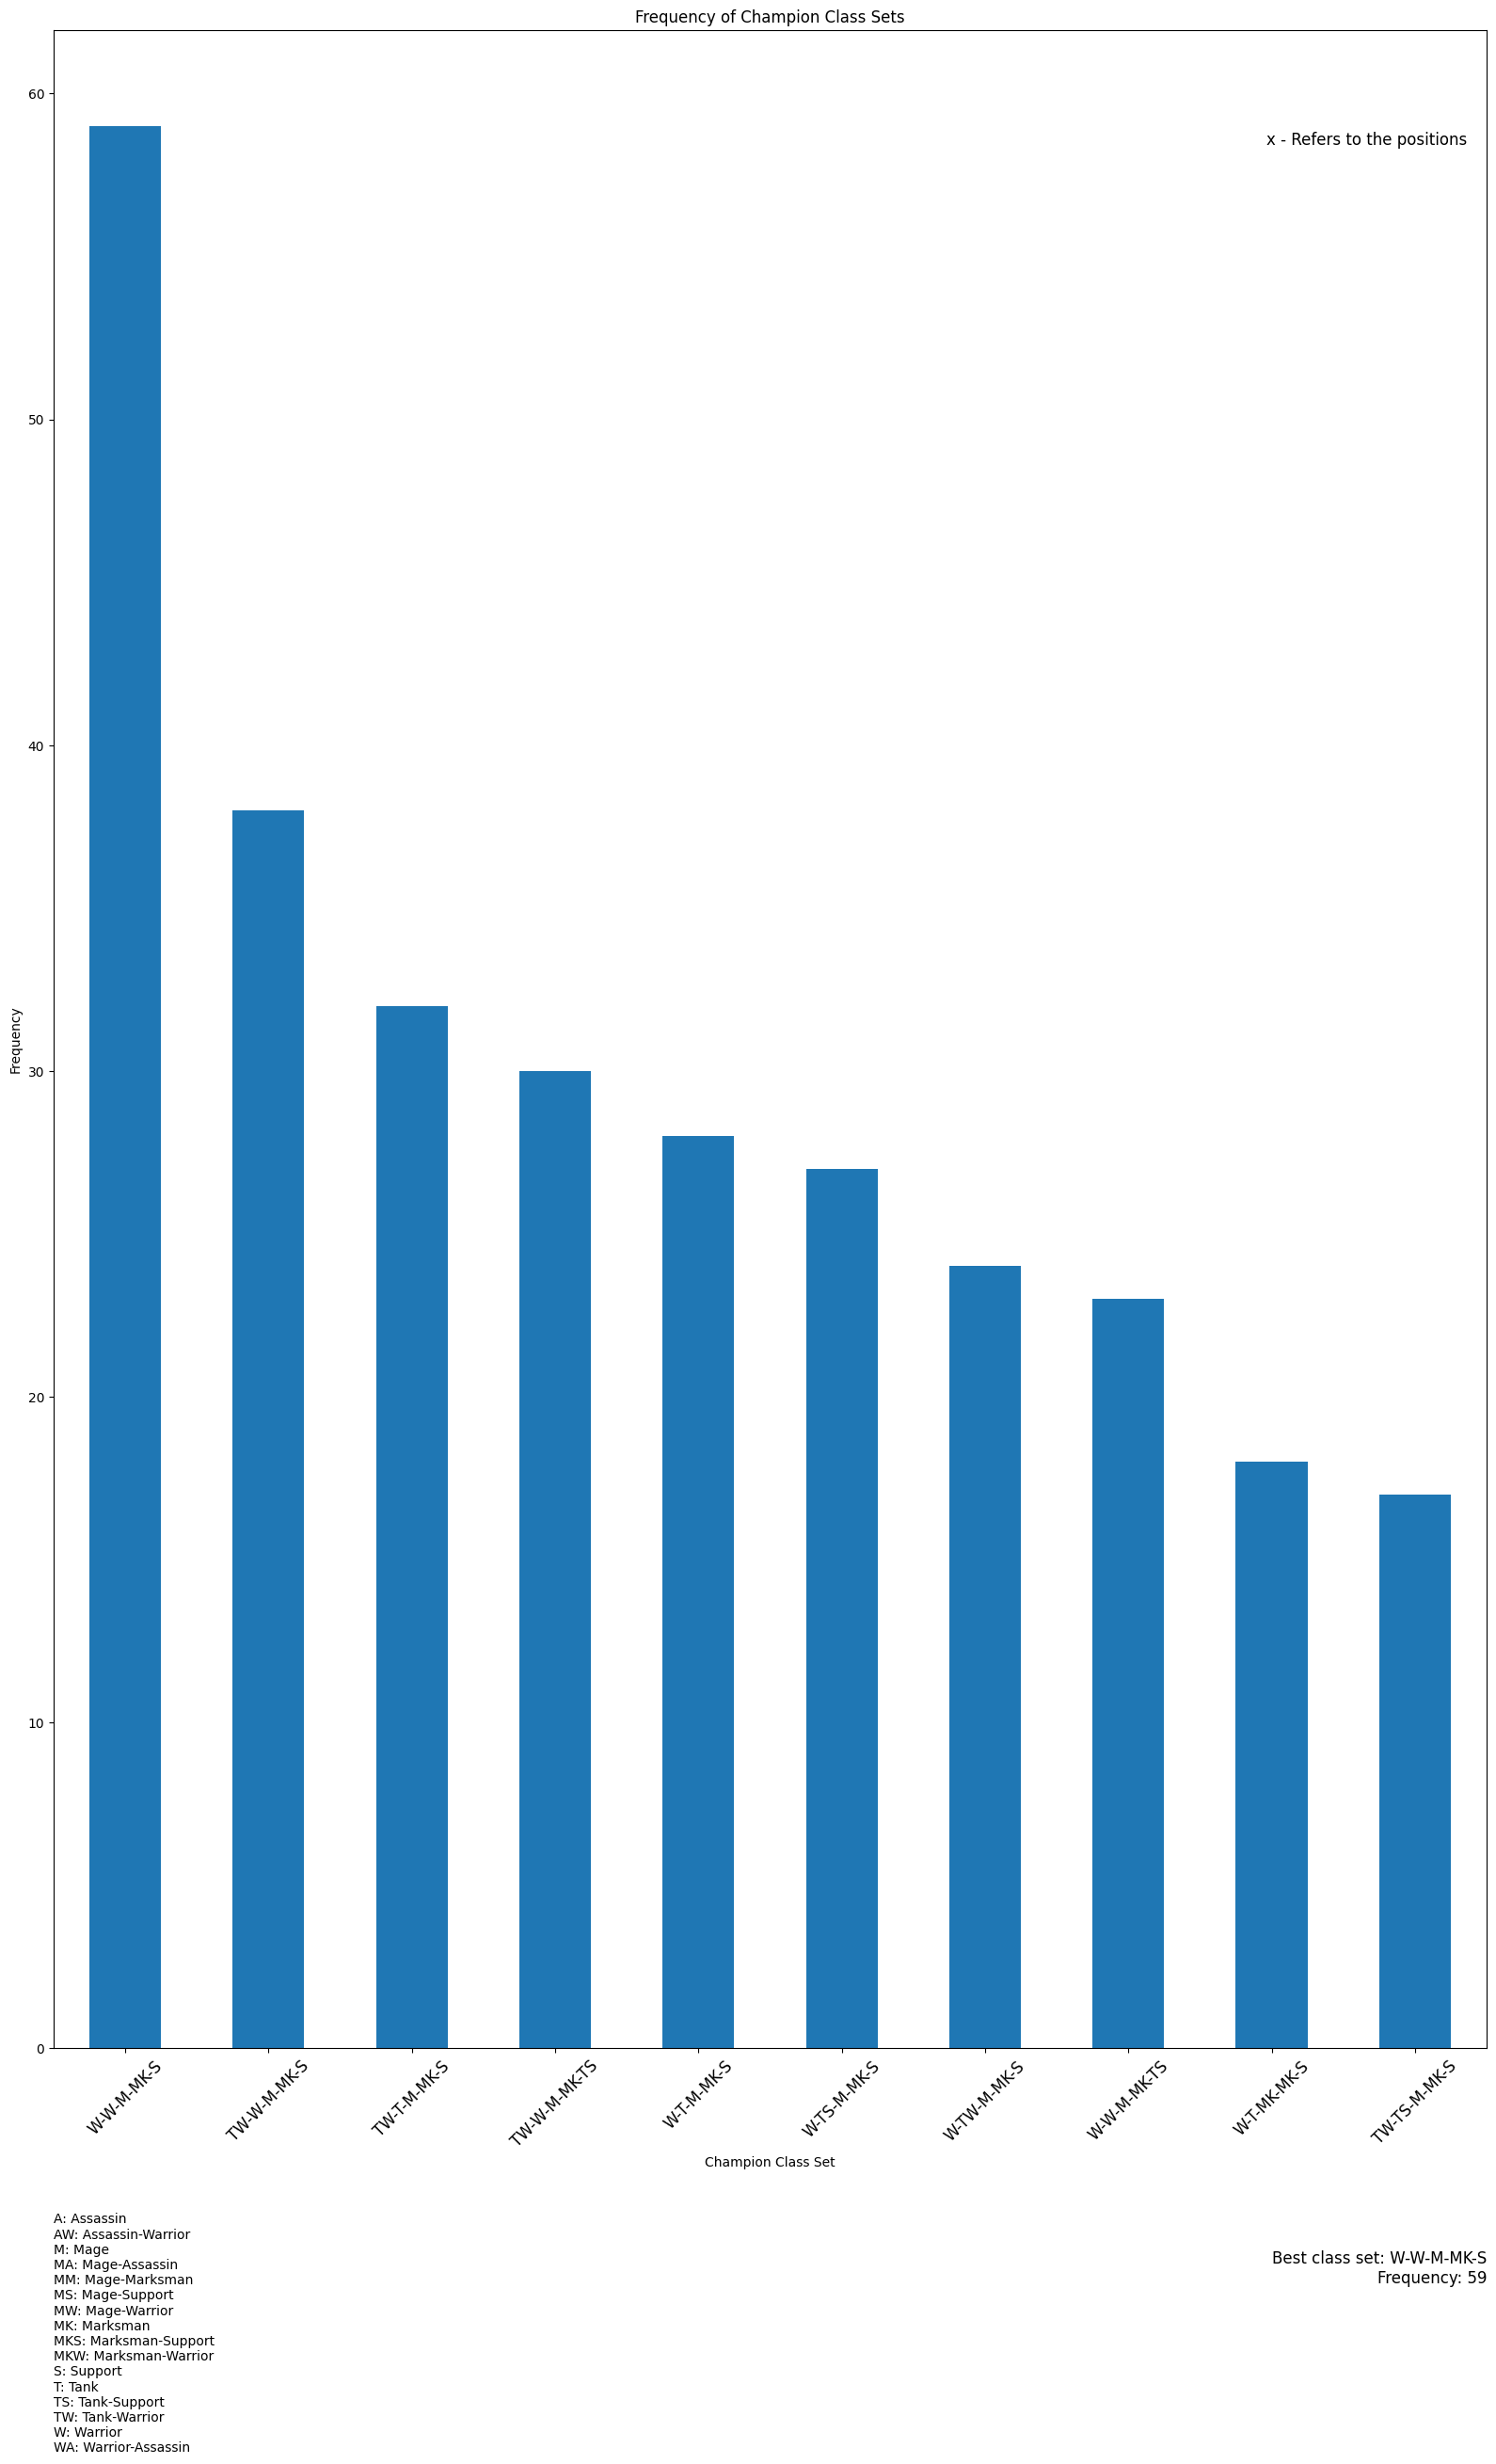

In [163]:
# Define the dataframe with team compositions
data = merged_data[['P1 Top Class', 'P2 Jungle Class', 'P3 Mid Class', 'P4 Bot Class', 'P5 Support Class']]
dfs = pd.DataFrame(data)
# Fill any NaN values with a placeholder string
dfs = dfs.fillna('Unknown')

# Convert all values to strings
dfs = dfs.astype(str)

# Mapping dictionary to replace class names with letters
class_mapping = {
    'Assassin': 'A',
    'Assassin-Warrior': 'AW',
    'Mage': 'M',
    'Mage-Assassin': 'MA',
    'Mage-Marksman': 'MM',
    'Mage-Support': 'MS',
    'Mage-Warrior': 'MW',
    'Marksman': 'MK',
    'Marksman-Support': 'MKS',
    'Marksman-Warrior': 'MKW',
    'Support': 'S',
    'Tank': 'T',
    'Tank-Support': 'TS',
    'Tank-Warrior': 'TW',
    'Warrior': 'W',
    'Warrior-Assassin': 'WA',

}


# Dictionary to map class abbreviations back to full names
class_mapping_reverse = {v: k for k, v in class_mapping.items()}


# Rename class columns with letters
for col in dfs.columns:
    dfs[col] = dfs[col].map(class_mapping)

# Concatenate the class columns to create a new column representing the class set
dfs['Class_Set'] = dfs.apply(lambda row: '-'.join(row), axis=1)

# Count the occurrences of each class set
top_class_sets = dfs['Class_Set'].value_counts().head(10)

# Plotting
plt.figure(figsize=(16, 26))  # Increase the height to accommodate the label below
top_class_sets.plot(kind='bar')
plt.title('Frequency of Champion Class Sets')
plt.xlabel('Champion Class Set')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=12)  # Adjust the rotation and fontsize as needed

# Display class_mapping_reverse at the bottom left of the plot
table_text = '\n'.join([f'{abbr}: {full}' for abbr, full in class_mapping_reverse.items()])
plt.text(0, -0.2, table_text, ha='left', fontsize=10, transform=plt.gca().transAxes)

# Find the class set with the highest frequency
best_class_set = top_class_sets.idxmax()
best_frequency = top_class_sets.max()

# Add text on the top right
bot_right_text = f'Best class set: {best_class_set}\nFrequency: {best_frequency}'
plt.text(1, -0.1, bot_right_text, ha='right', va='top', fontsize=12, transform=plt.gca().transAxes)

top_right_text = f'x - Refers to the positions '
plt.text(0.99, 0.95, top_right_text, ha='right', va='top', fontsize=12, transform=plt.gca().transAxes)


plt.tight_layout()
plt.show()





#### The best champion class set is: W-W-M-MK-S
#### Frequency of occurrence: 59

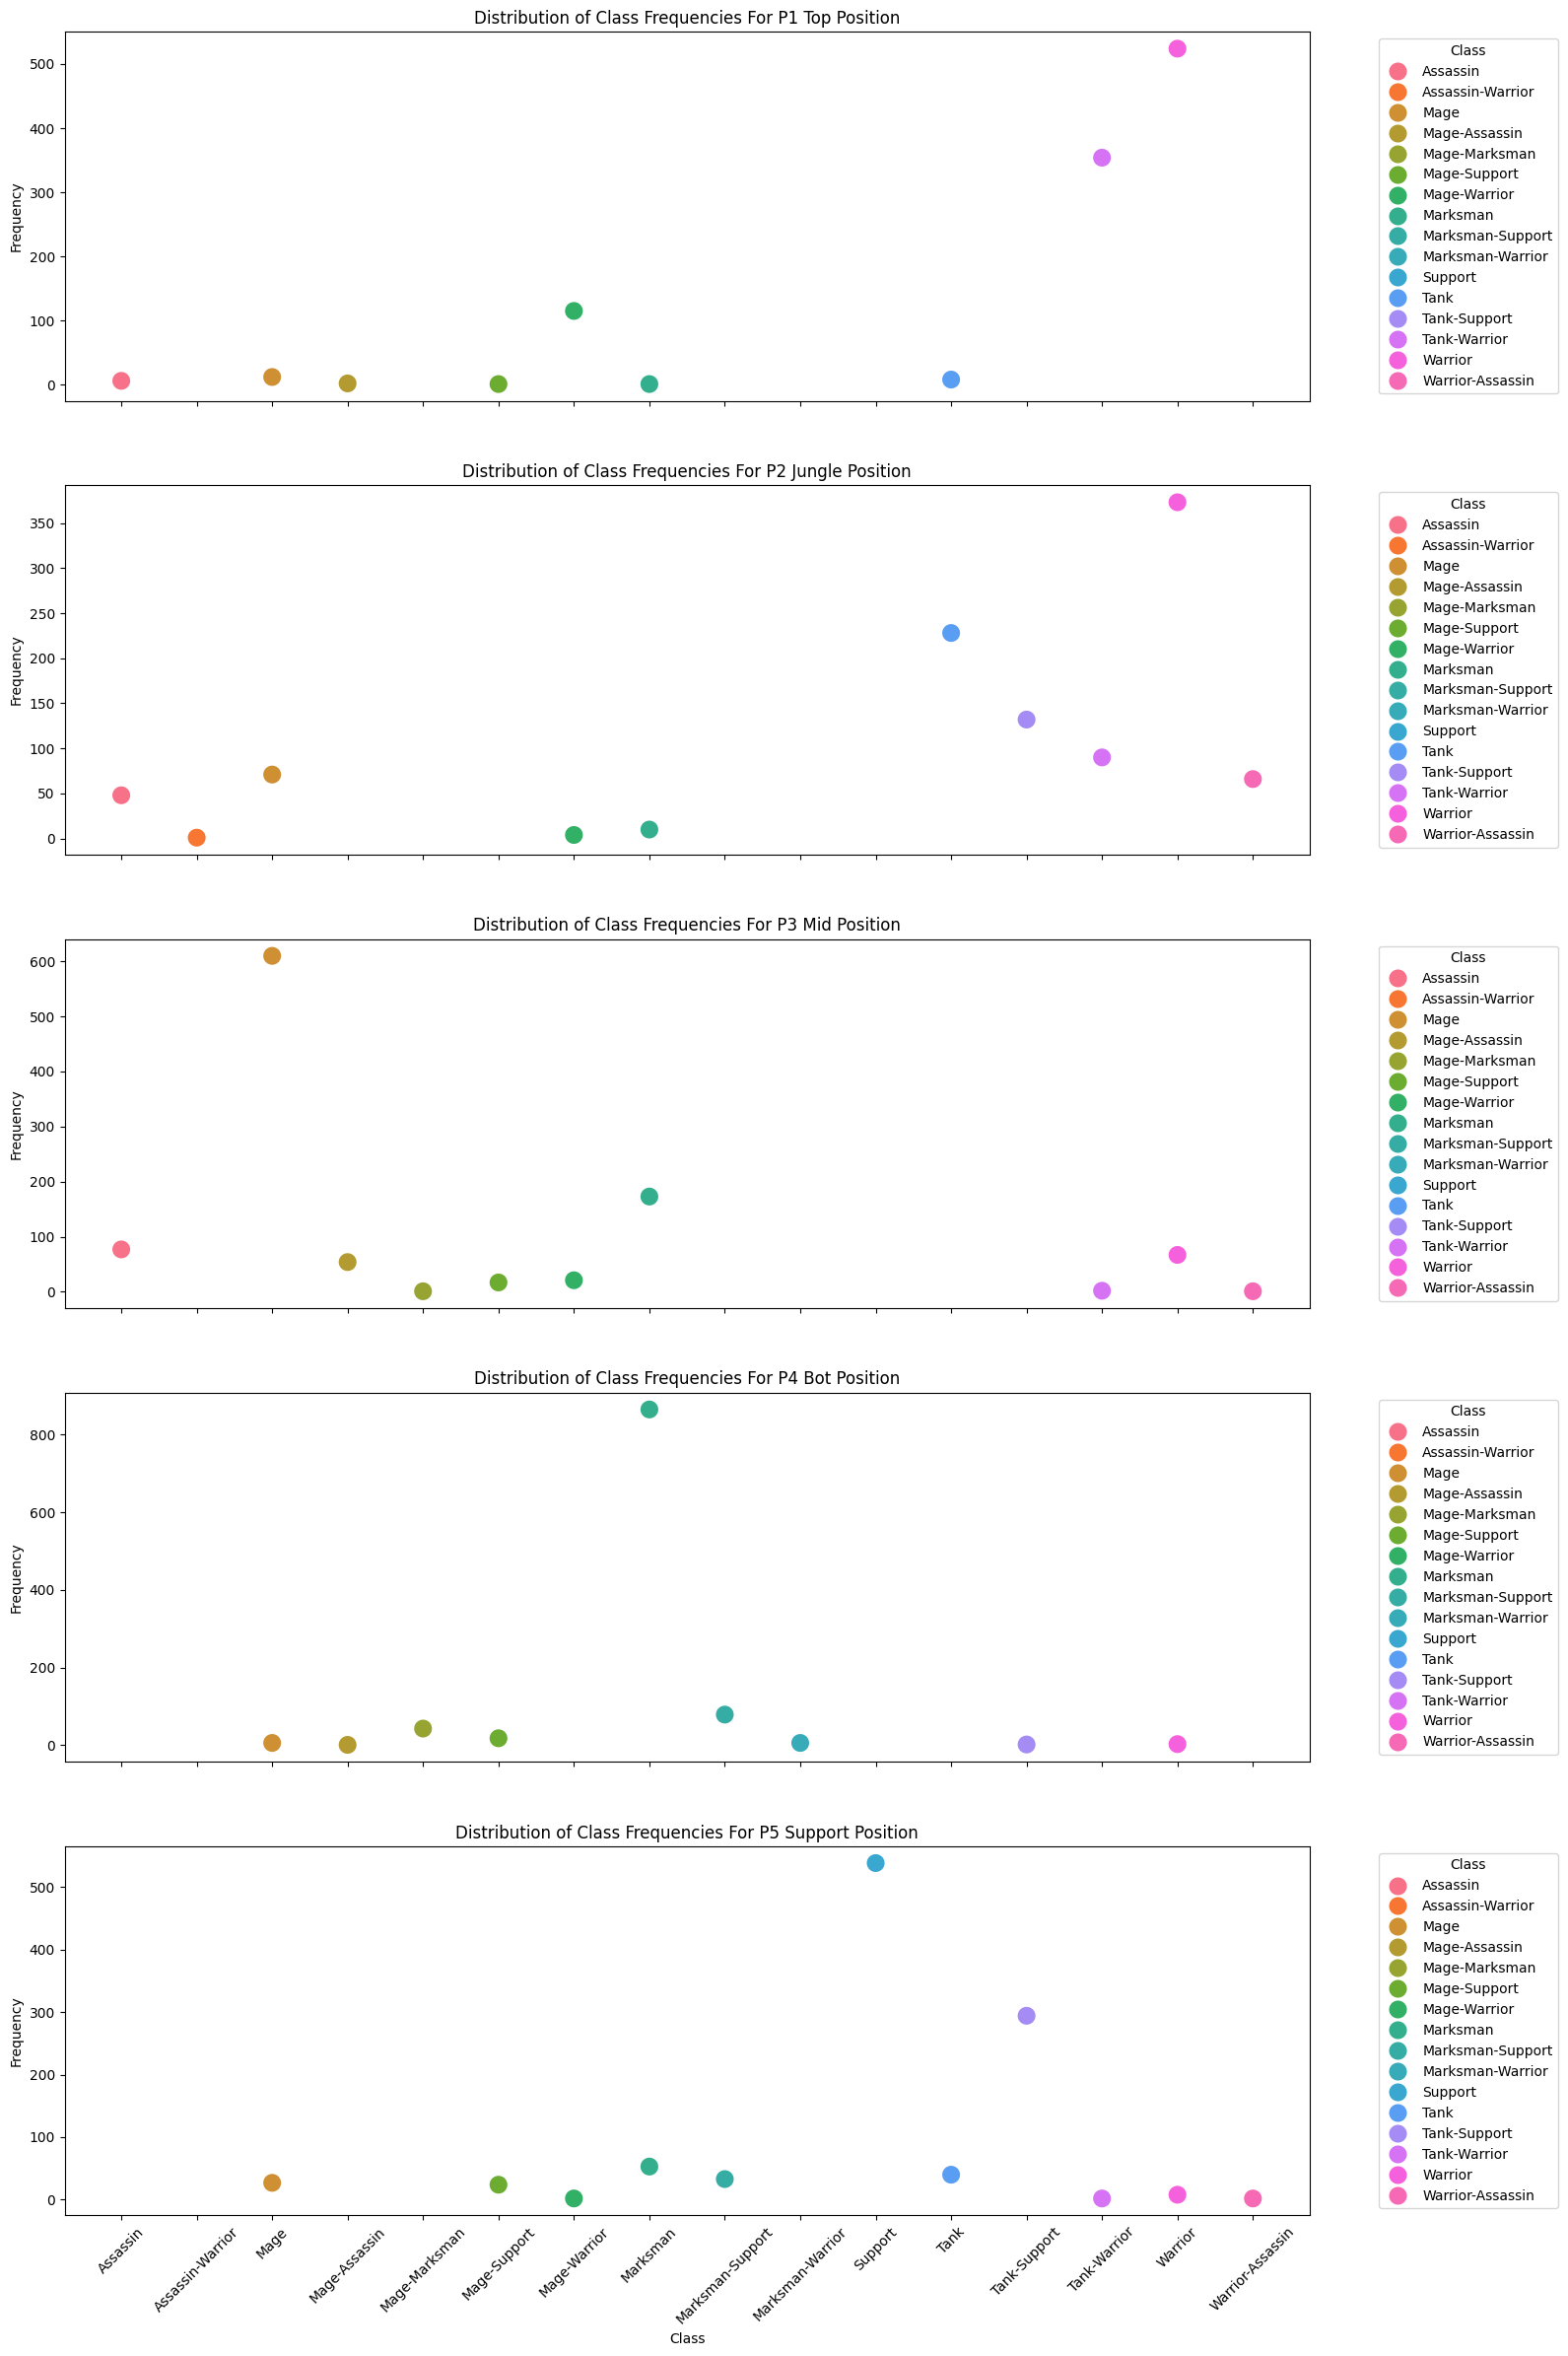

In [164]:

# data = merged_data[['P1 Top Class', 'P2 Jungle Class', 'P3 Mid Class', 'P4 Bot Class', 'P5 Support Class']]

df = pd.DataFrame(data)

# Calculate class frequencies for each position
class_frequencies = df.apply(pd.Series.value_counts)

# Transpose the DataFrame for better visualization
class_frequencies = class_frequencies.T

# Reset index to make position a column instead of index
class_frequencies.reset_index(inplace=True)

# Melt the DataFrame to convert it to long format for plotting
class_frequencies_melted = pd.melt(class_frequencies, id_vars=['index'], var_name='Class', value_name='Frequency')

# Filter data for each position
df_p1 = class_frequencies_melted[class_frequencies_melted['index'] == 'P1 Top Class']
df_p2 = class_frequencies_melted[class_frequencies_melted['index'] == 'P2 Jungle Class']
df_p3 = class_frequencies_melted[class_frequencies_melted['index'] == 'P3 Mid Class']
df_p4 = class_frequencies_melted[class_frequencies_melted['index'] == 'P4 Bot Class']
df_p5 = class_frequencies_melted[class_frequencies_melted['index'] == 'P5 Support Class']

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(16, 24), sharex=True)

# Plot for P1 Top Class
sns.scatterplot(data=df_p1, x='Class', y='Frequency', hue='Class', s=200, ax=axes[0])
axes[0].set_title('Distribution of Class Frequencies For P1 Top Position')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Plot for P2 Jungle Class
sns.scatterplot(data=df_p2, x='Class', y='Frequency', hue='Class', s=200, ax=axes[1])
axes[1].set_title('Distribution of Class Frequencies For P2 Jungle Position')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# Plot for P3 Mid Class
sns.scatterplot(data=df_p3, x='Class', y='Frequency', hue='Class', s=200, ax=axes[2])
axes[2].set_title('Distribution of Class Frequencies For P3 Mid Position')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Frequency')
axes[2].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].tick_params(axis='x', rotation=45)

# Plot for P4 Bot Class
sns.scatterplot(data=df_p4, x='Class', y='Frequency', hue='Class', s=200, ax=axes[3])
axes[3].set_title('Distribution of Class Frequencies For P4 Bot Position')
axes[3].set_xlabel('Class')
axes[3].set_ylabel('Frequency')
axes[3].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[3].tick_params(axis='x', rotation=45)

# Plot for P5 Support Class
sns.scatterplot(data=df_p5, x='Class', y='Frequency', hue='Class', s=200, ax=axes[4])
axes[4].set_title('Distribution of Class Frequencies For P5 Support Position')
axes[4].set_xlabel('Class')
axes[4].set_ylabel('Frequency')
axes[4].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[4].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



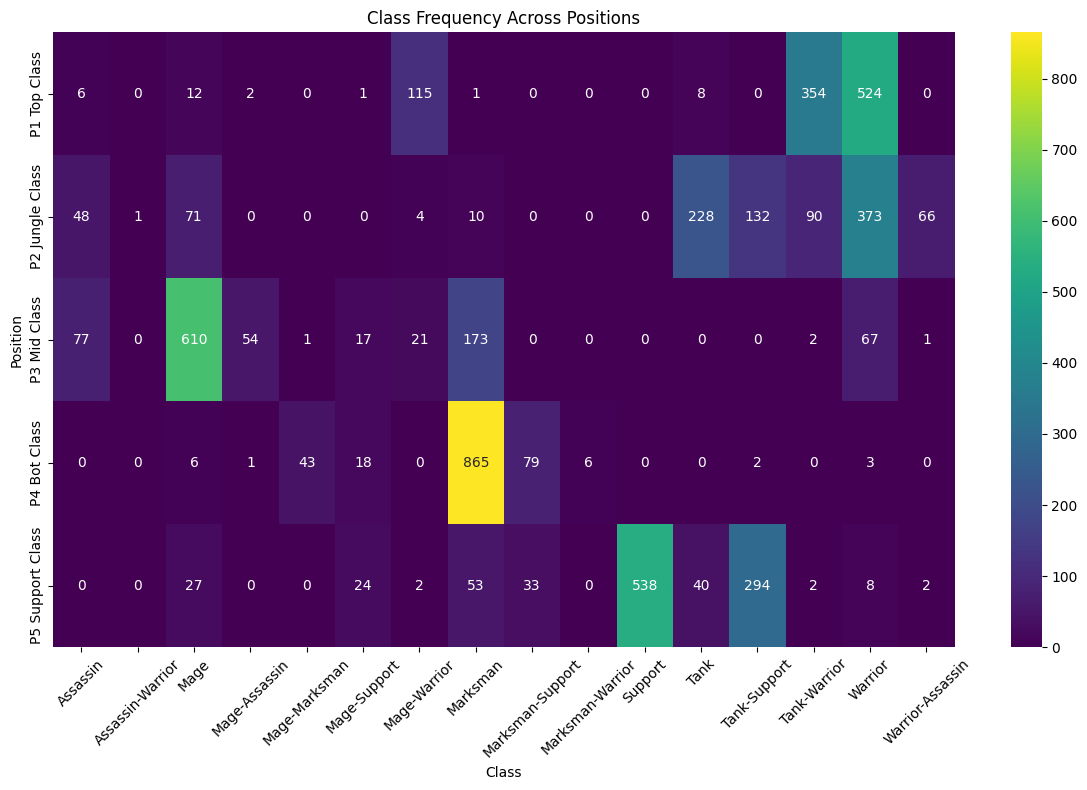

In [165]:
# Pivot the DataFrame
heatmap_data = class_frequencies_melted.pivot_table(index='index', columns='Class', values='Frequency', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.0f')  # Use '.0f' for floats
plt.title('Class Frequency Across Positions')
plt.xlabel('Class')
plt.ylabel('Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

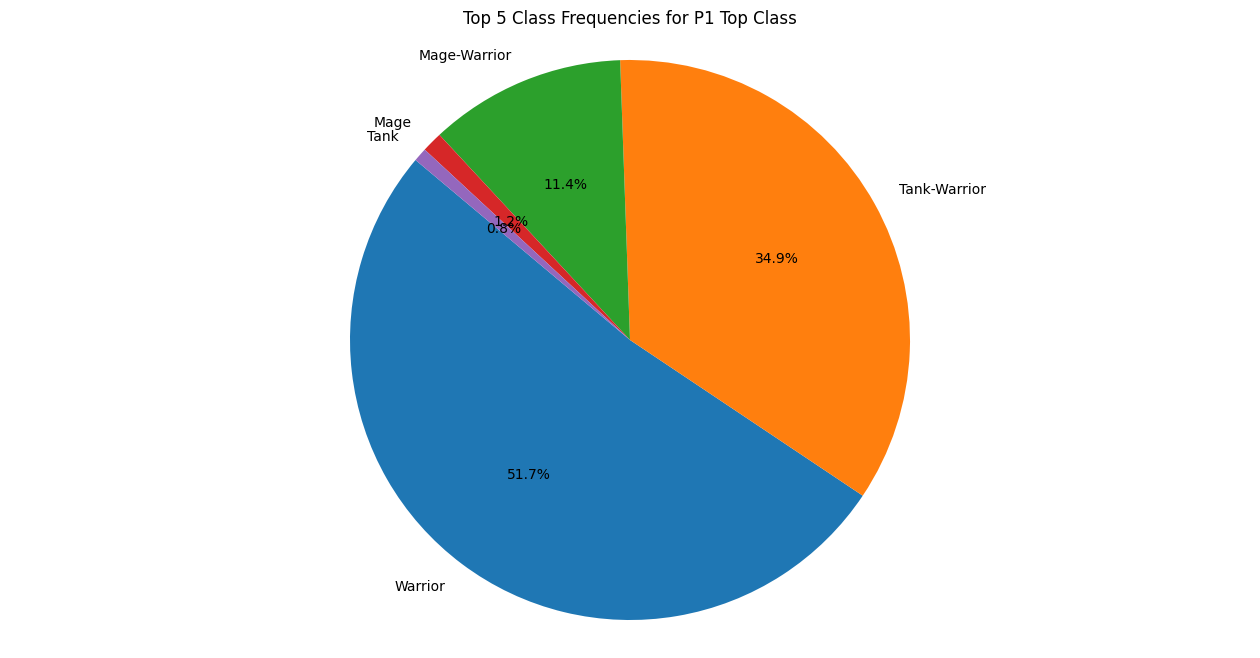

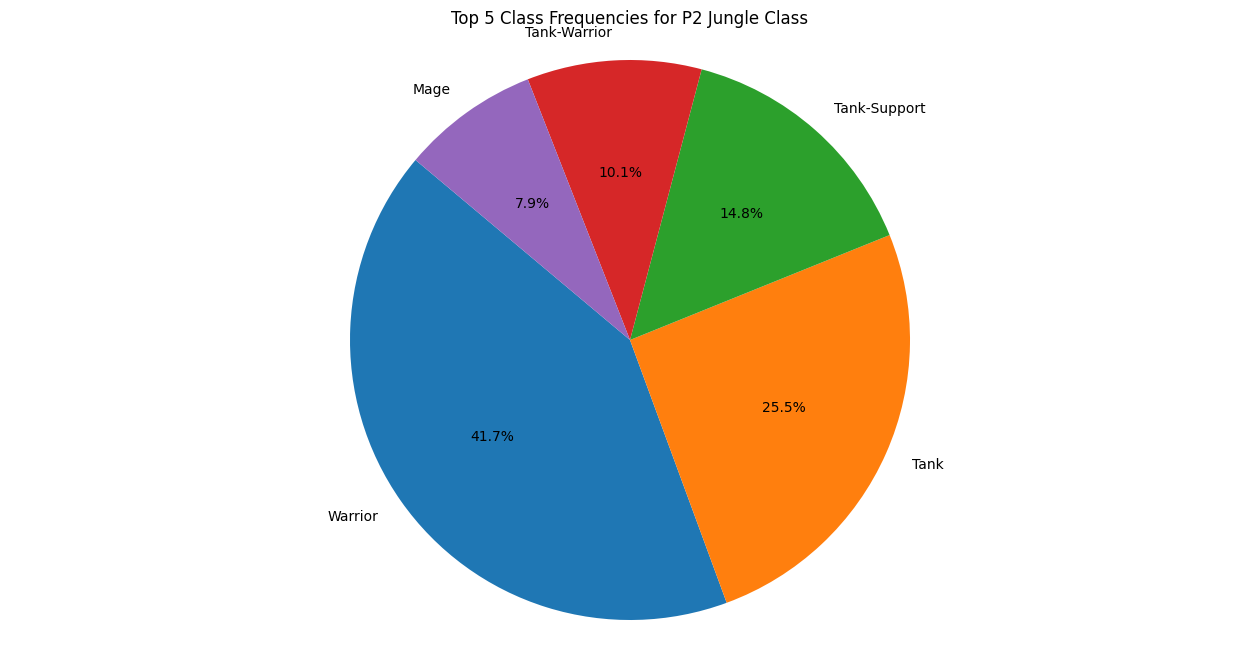

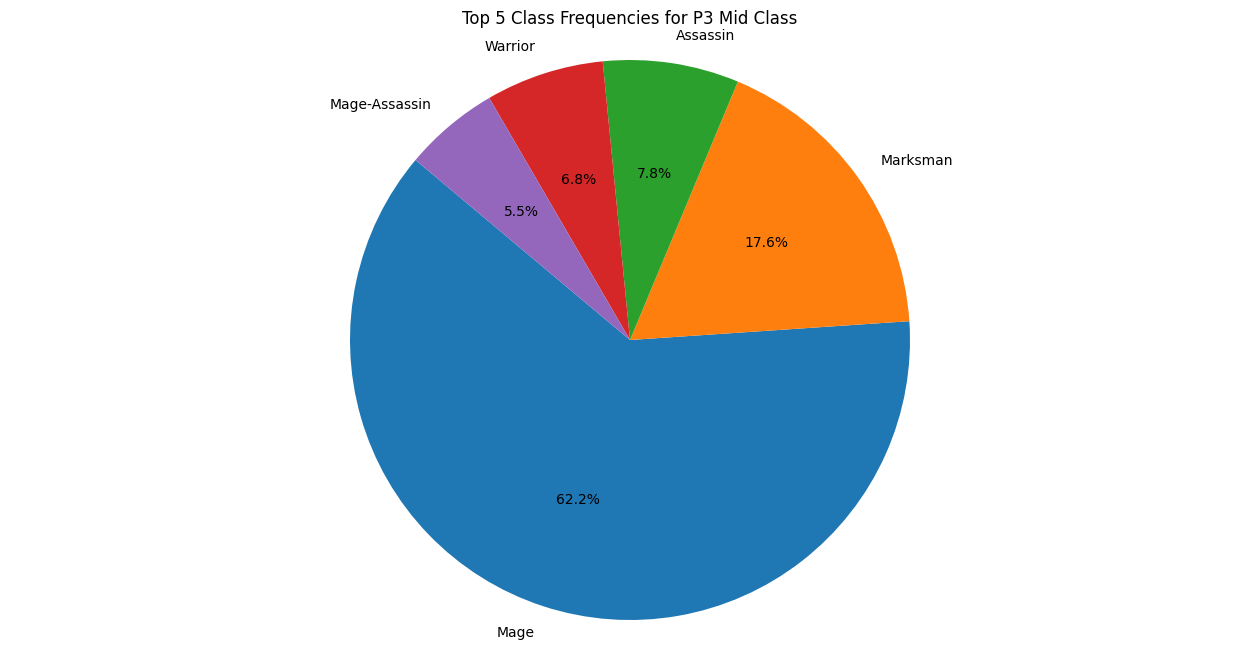

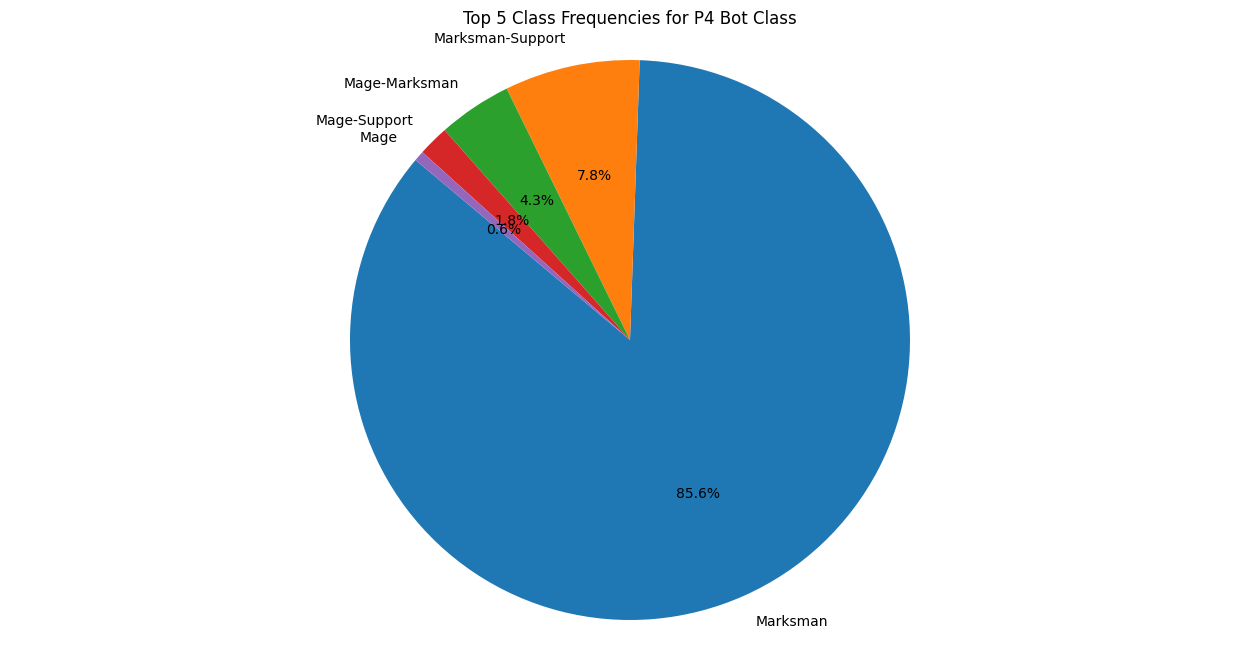

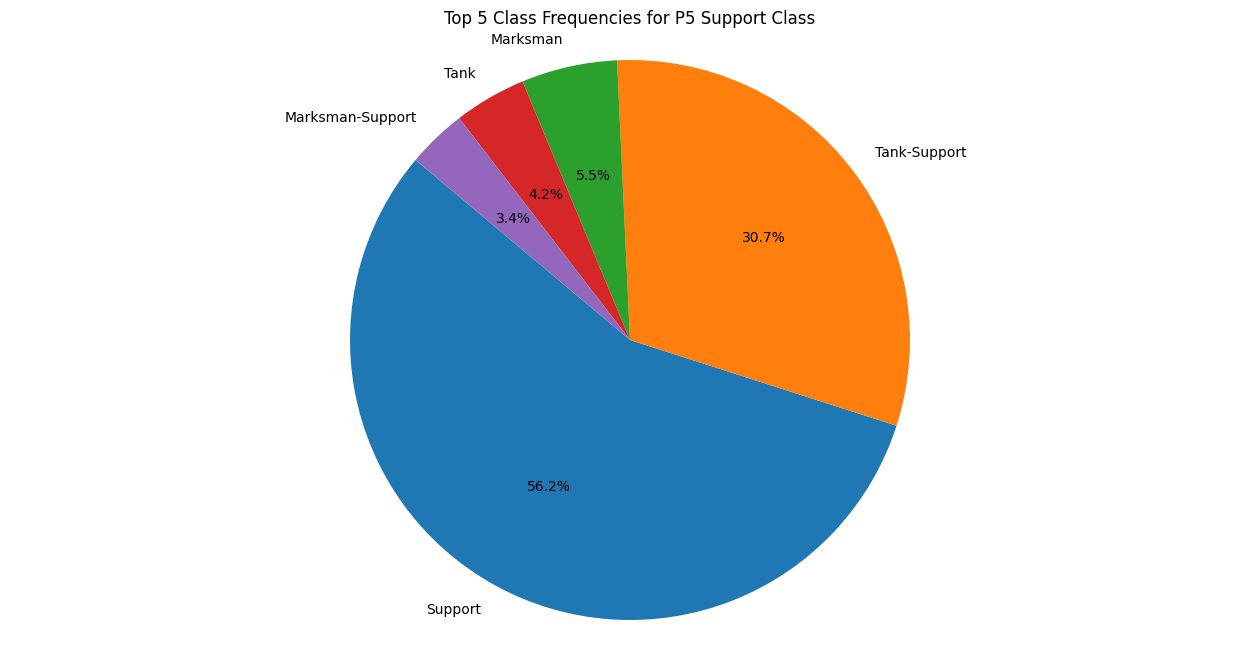

In [166]:
# Iterate over each position
positions = class_frequencies_melted['index'].unique()
for position in positions:
    # Filter data for the current position
    df_position = class_frequencies_melted[class_frequencies_melted['index'] == position]
    
    # Calculate total frequencies for each class for the current position
    total_class_frequencies = df_position.groupby('Class')['Frequency'].sum()
    
    # Sort the class frequencies in descending order and select the top 5 classes
    top_5_classes = total_class_frequencies.sort_values(ascending=False).head(5)
    
    # Plot the pie chart for the top 5 classes in the current position
    plt.figure(figsize=(16, 8))
    plt.pie(top_5_classes, labels=top_5_classes.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Class Frequencies for {position}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


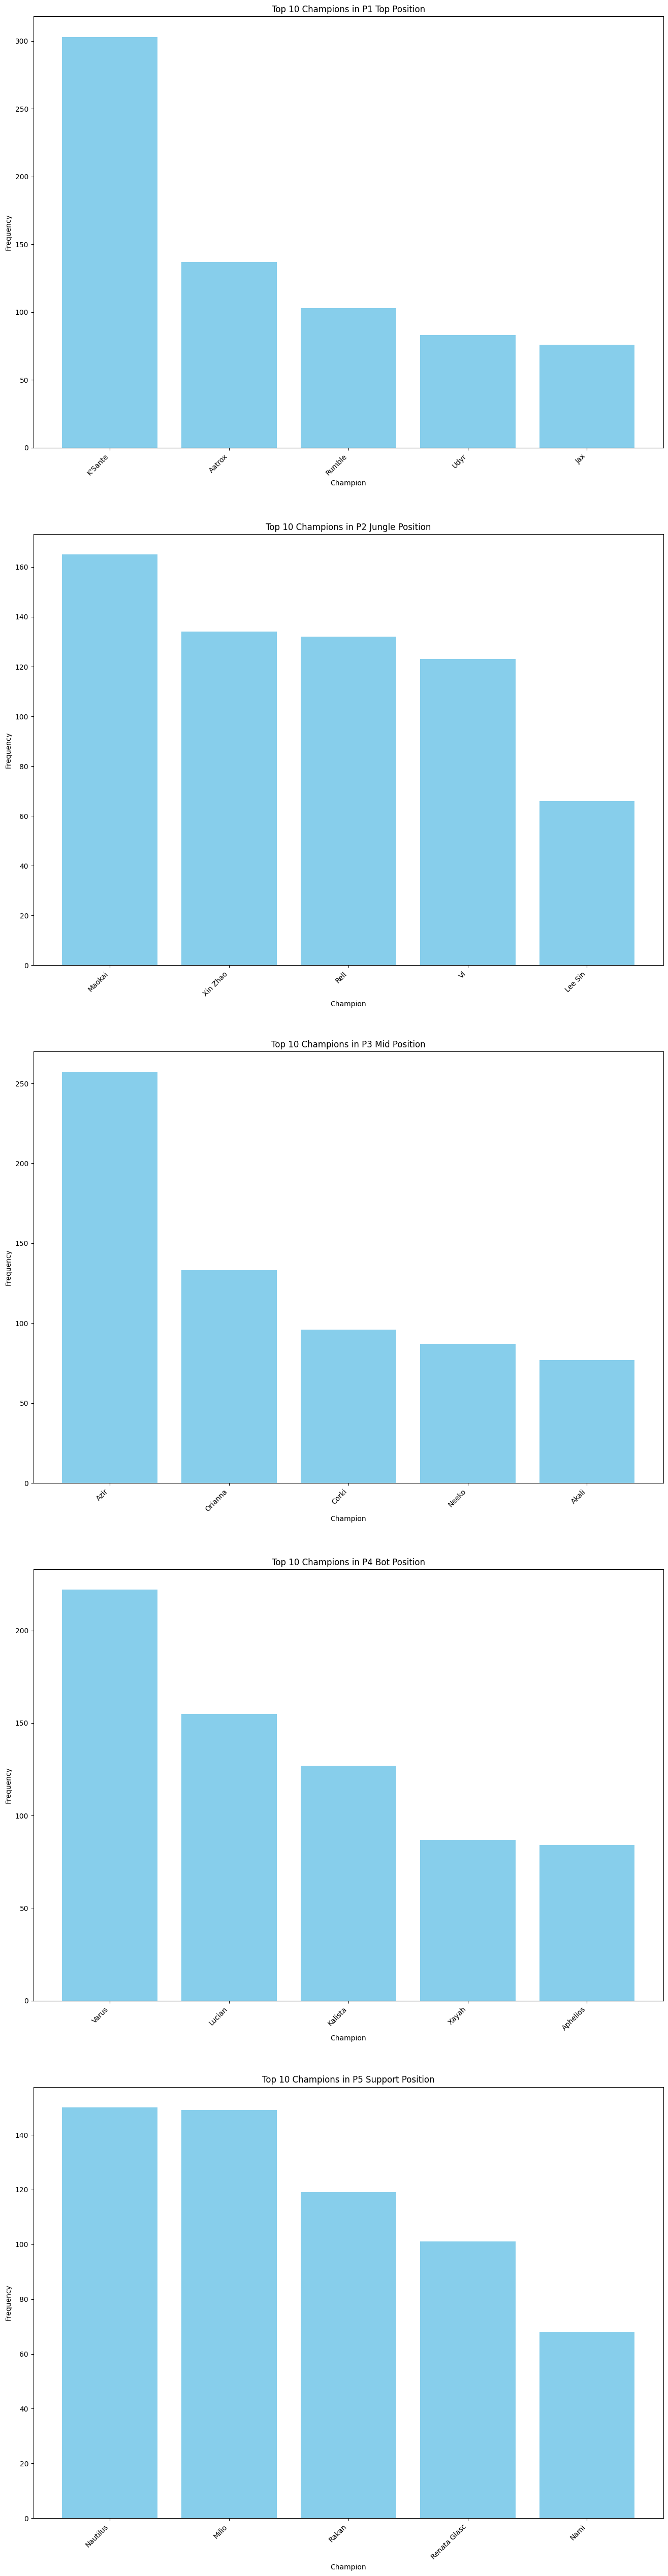

In [167]:
# Assuming 'combined_dataframe' is the name of your DataFrame
# Assuming you have already combined your dataframes and stored them in 'combined_dataframe'

# Define positions
positions = ['P1 Top', 'P2 Jungle', 'P3 Mid', 'P4 Bot', 'P5 Support']

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(16, 64))

# Loop through positions and plot
for i, pos in enumerate(positions):
    # Count the occurrences of each champion in the current position
    top_10_champions = combined_dataframe[pos].value_counts().head(5)
    
    # Plotting
    axs[i].bar(top_10_champions.index, top_10_champions.values, color='skyblue')
    axs[i].set_title(f'Top 10 Champions in {pos} Position')
    axs[i].set_xlabel('Champion')
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=45)

    axs[i].set_xticks(range(len(top_10_champions.index)))
    axs[i].set_xticklabels(top_10_champions.index, rotation=45, ha='right')

# Adjust layout
plt.show()

This is to show the top 5 champions in their respective roles that has the highest frequency in 'combined_dataframe'. 

In [168]:
pos = {
    1: "P1 Top",
    2: "P2 Jungle",
    3: "P3 Mid",
    4: "P4 Bot",
    5: "P5 Support",
}

for i in pos:
    numOfGamesWonBasedOnRole = 0
    top5 = combined_dataframe[pos[i]].value_counts().head(5)
    numOfGamesWonBasedOnRole += len(loldata[((loldata['t1p'+str(i)+'_champion'].isin(top5.index)) & loldata['t1_result'] == 1) | ((loldata['t2p'+str(i)+'_champion'].isin(top5.index)) & loldata['t2_result'] == 1)])
    print(numOfGamesWonBasedOnRole)
    print('\n')



702


620


650


675


587




## Which factors contributes to the most amount of gold earned (minion, kills, towers, neutral objectives (Baron, Dragon, Jungle camps))?

Baron, Dragon, Herald, Tower,

In [174]:


lolData_Qtn2_Columns = ['t1_totalgold','t2_totalgold','t1_barons','t2_barons','t1_dragons','t2_dragons','t1_heralds','t2_heralds','t1_towers','t2_towers','t1_inhibitors','t2_inhibitors','t1_kills','t2_kills','t1_totalcs','t2_totalcs']
loldataQtn2 = loldata[lolData_Qtn2_Columns][(loldata['t2_towers'].notna()) & (loldata['t2_inhibitors'].notna())].copy()
lolData_Qtn2_Columns2 = ['t1_totalgold','t2_totalgold','t1_barons','t2_barons','t1_dragons','t2_dragons','t1_heralds','t2_heralds','t1_towers','t2_towers','t1_inhibitors','t2_inhibitors','t1_kills','t2_kills','t1_totalcs','t2_totalcs']
loldataQtn2_columnsUpdated = loldataQtn2[lolData_Qtn2_Columns2].copy()
loldataQtn2_columnsUpdated.columns = ['T1  Total Gold','T2  Total Gold','T1 Barons','T2 Barons','T1 Dragons','T2 Dragons','T1 Heralds','T2 Heralds','T1 Towers','T2 Towers','T1 Inhibitors','T2 Inhibitors','T1 Kills','T2 Kills','T1 Total CS','T2 Total CS']


display(loldataQtn2_columnsUpdated)
print(loldataQtn2_columnsUpdated.dtypes)

,T1 Total Gold,T2 Total Gold,T1 Barons,T2 Barons,T1 Dragons,T2 Dragons,T1 Heralds,T2 Heralds,T1 Towers,T2 Towers,T1 Inhibitors,T2 Inhibitors,T1 Kills,T2 Kills,T1 Total CS,T2 Total CS
0,49907,61737.0000,0,2,2,3,0,0,2,9.0,0,1.0,3,16,1043,1100
1,49552,63623.0000,0,1,0,4,0,0,2,9.0,0,1.0,3,17,956,1114
2,51091,30710.0000,1,0,2,1,0,0,10,0.0,2,0.0,21,3,786,588
3,67148,55842.0000,1,0,2,4,0,0,10,3.0,2,0.0,17,9,1100,1113
4,71812,68001.0000,0,1,4,2,0,0,7,4.0,1,0.0,23,20,1219,1150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,76190,7.0486,2,0,4,2,1,0,10,1.0,2,6.0,24,12,1182,1187
1019,51044,6.5854,1,0,3,0,0,1,9,0.0,2,8.0,17,7,862,758
1020,79939,8.6686,1,0,1,4,1,0,7,1.0,1,4.0,30,35,1156,1217
1021,40567,7.7243,0,1,0,4,0,1,1,1.0,0,2.0,5,19,803,938


T1  Total Gold      int64
T2  Total Gold    float64
T1 Barons           int64
T2 Barons           int64
T1 Dragons          int64
T2 Dragons          int64
T1 Heralds          int64
T2 Heralds          int64
T1 Towers           int64
T2 Towers         float64
T1 Inhibitors       int64
T2 Inhibitors     float64
T1 Kills            int64
T2 Kills            int64
T1 Total CS         int64
T2 Total CS         int64
dtype: object


In [175]:
totalGoldEarned_t1 = pd.DataFrame(loldataQtn2['t1_totalgold'])
print("Data type : ", type(totalGoldEarned_t1))
print("Data dims : ", totalGoldEarned_t1.size)
totalGoldEarned_t1.describe()


Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  855


,t1_totalgold
count,855.000000
mean,59035.115789
std,10969.938232
min,32658.000000
25%,51277.500000
50%,58418.000000
75%,65862.500000
max,100012.000000


In [176]:
totalGoldEarned_t2 = pd.DataFrame(loldataQtn2['t2_totalgold'])
print("Data type : ", type(totalGoldEarned_t2))
print("Data dims : ", totalGoldEarned_t1.size)
totalGoldEarned_t2.describe()


Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  855


,t2_totalgold
count,855.000000
mean,12864.853992
std,24770.780058
min,4.202600
25%,7.413600
50%,8.510200
75%,10.449550
max,100353.000000


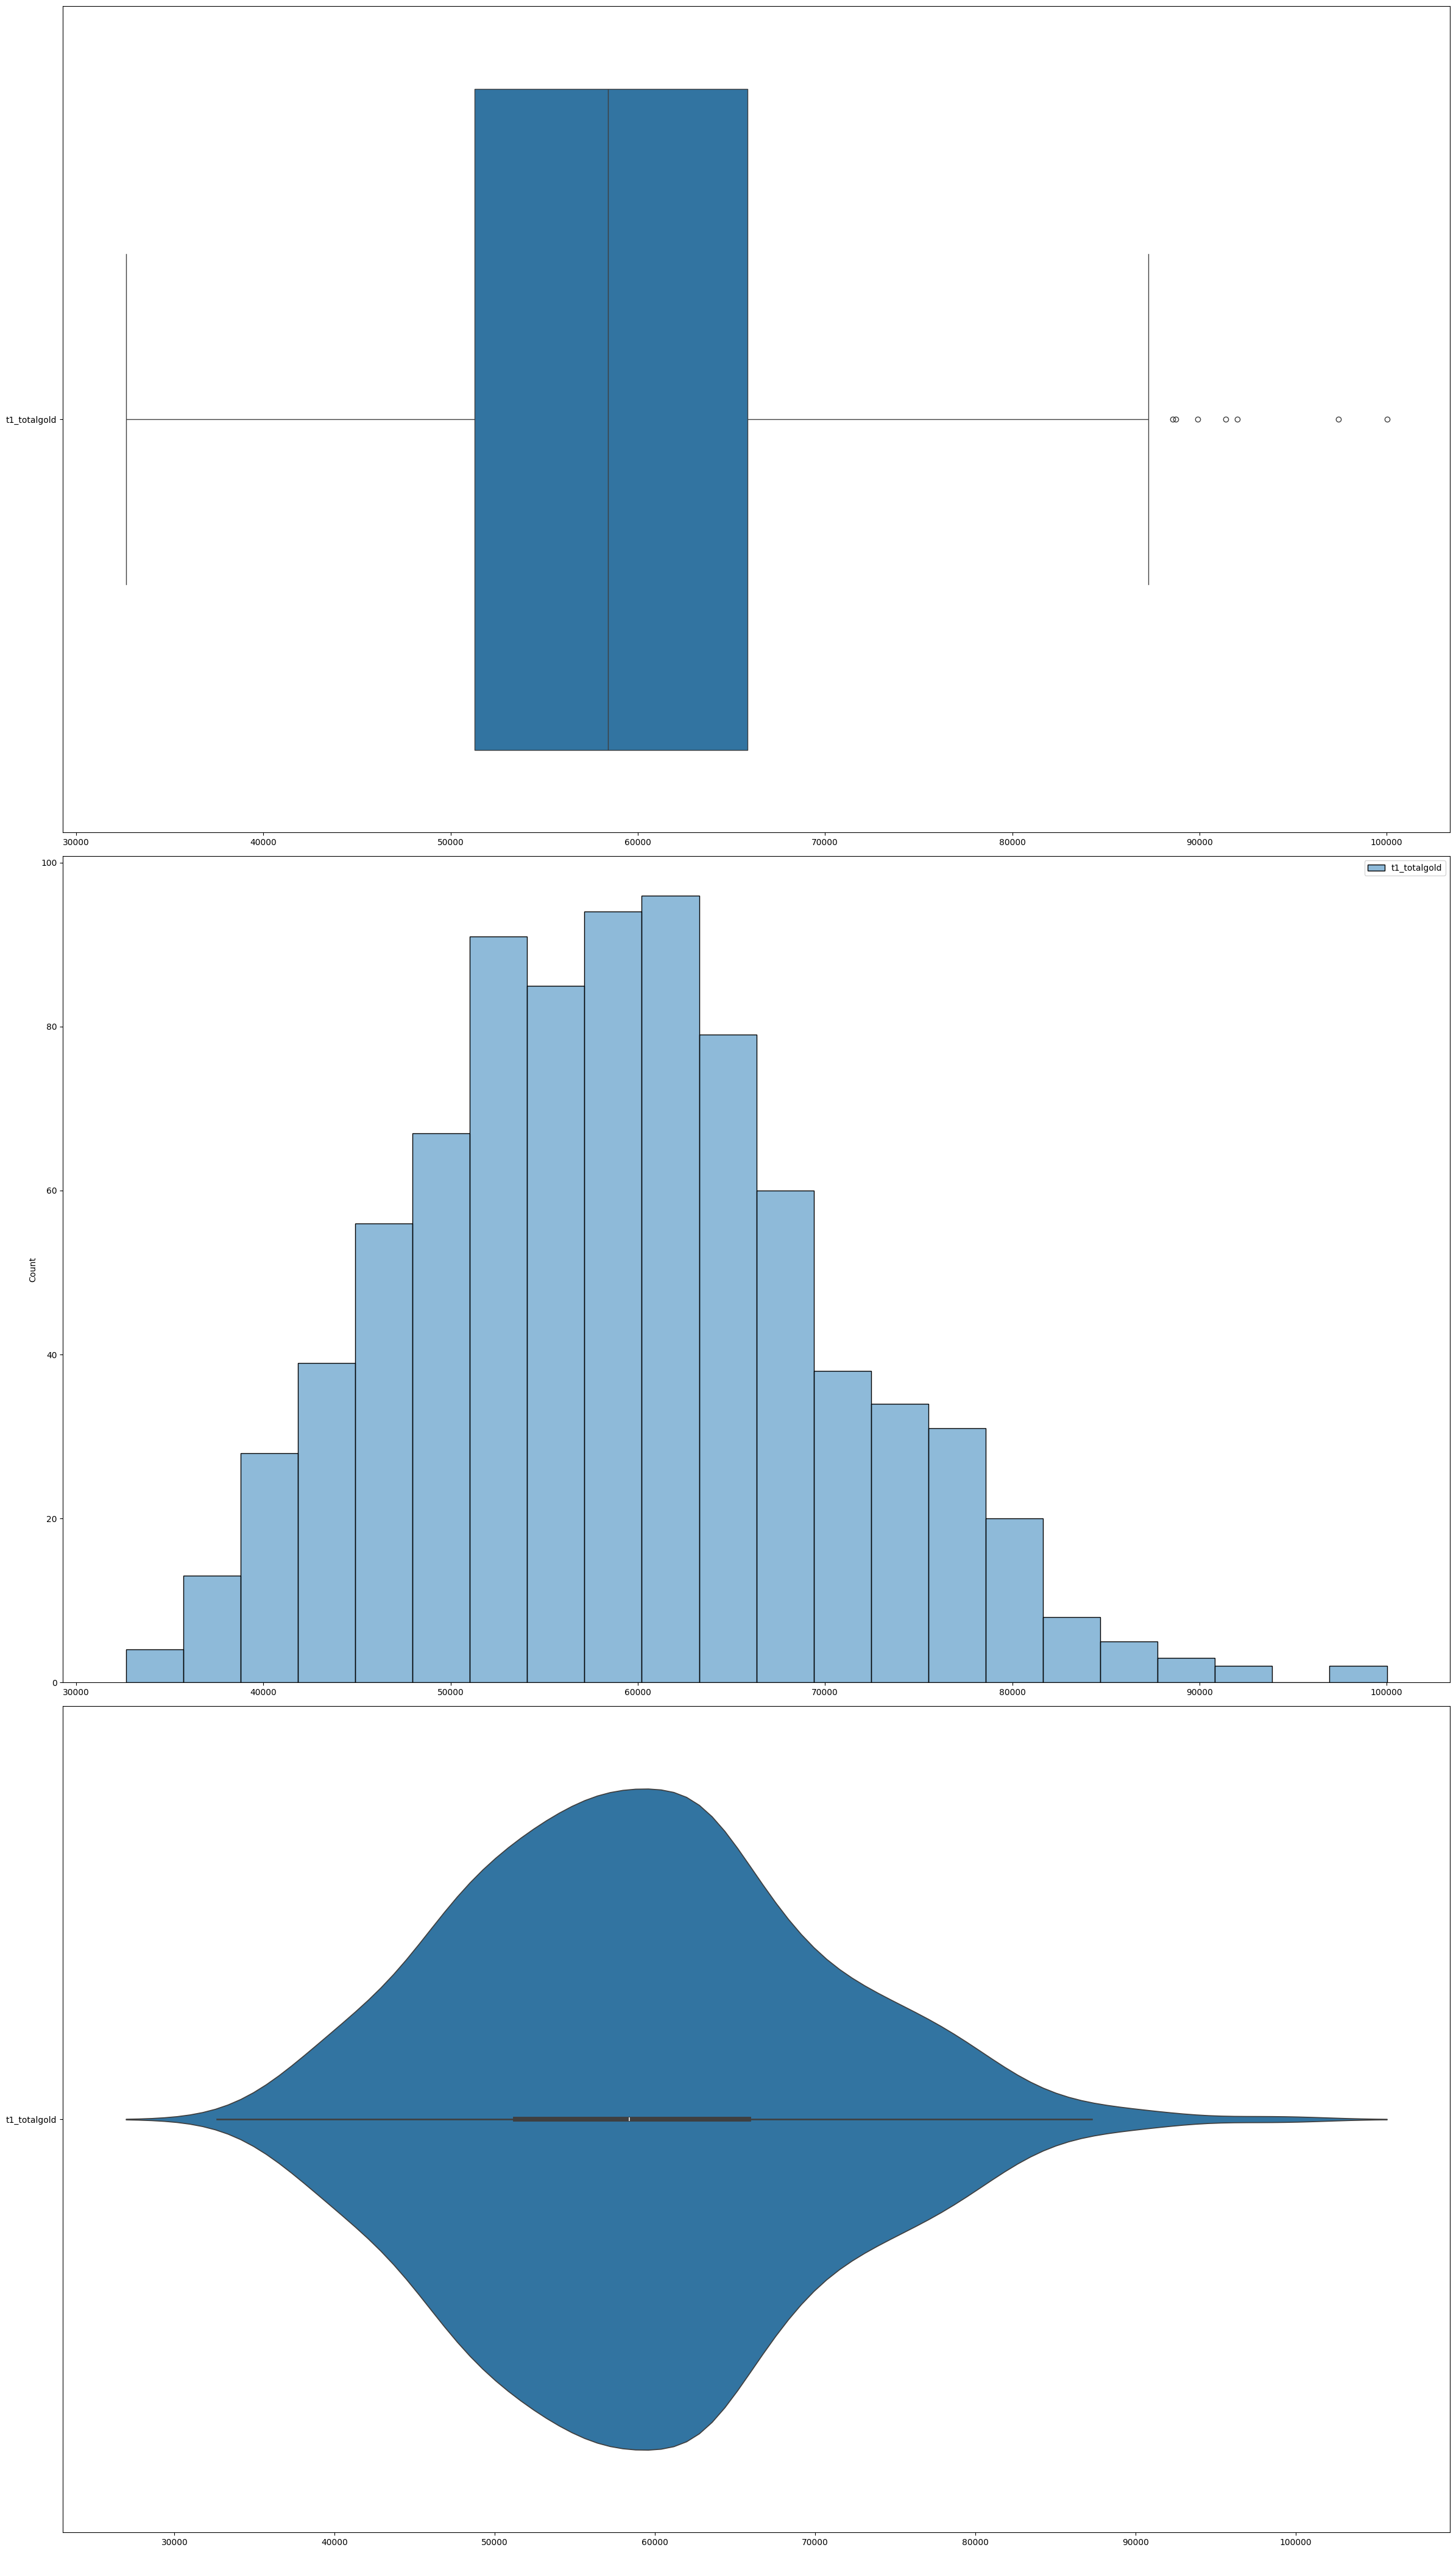

In [172]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(24, 42))  # Change the number of rows to 1

# Plot the basic uni-variate figures for HP Train
sns.boxplot(data=totalGoldEarned_t1, orient="h", ax=axes[0])  # Use axes[0] for the first subplot
sns.histplot(data=totalGoldEarned_t1, ax=axes[1])  # Use axes[1] for the second subplot
sns.violinplot(data=totalGoldEarned_t1, orient="h", ax=axes[2])  # Use axes[2] for the third subplot



plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:


# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([hp_train, total_train], axis = 1).reindex(hp_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = trainDF, x = "HP", y = "Total", height = 12)